In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# PIL to open & manipulate images
from PIL import Image, ImageOps, ImageChops

# for messages in loops
from IPython.display import clear_output

# to save arrays
import h5py

# for folder-timestamp
from datetime import datetime

# for train/test split
from sklearn.model_selection import train_test_split
# for one-hot encoding
from sklearn.preprocessing import LabelBinarizer
# for class weights
from sklearn.utils import class_weight
# for model evaluation
from sklearn.metrics import confusion_matrix, classification_report
# for efficient loops
import itertools

# keras
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.utils import HDF5Matrix
from tensorflow.python.keras.models import Sequential, load_model
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, \
    Dropout, Lambda, Activation, BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import callbacks

In [2]:
img_test = HDF5Matrix('/data/joint_scoring/img_test.h5', 'img_test')
labels_test = HDF5Matrix('/data/joint_scoring/labels_test.h5', 'labels_test')

In [3]:
model = load_model("/data/joint_scoring/models/20171028_110610.h5")

In [4]:
pred = model.predict_classes(img_test)

19611/19611 [==============================] - 12s    


In [22]:
with h5py.File('/data/joint_scoring/img_test.h5', 'r') as hf:
    img_test = hf['img_test'][:]
    
with h5py.File('/data/joint_scoring/labels_test.h5', 'r') as hf:
    labels_test = hf['labels_test'][:]

wrong = img_test[np.abs(pred - labels_test) > 3]

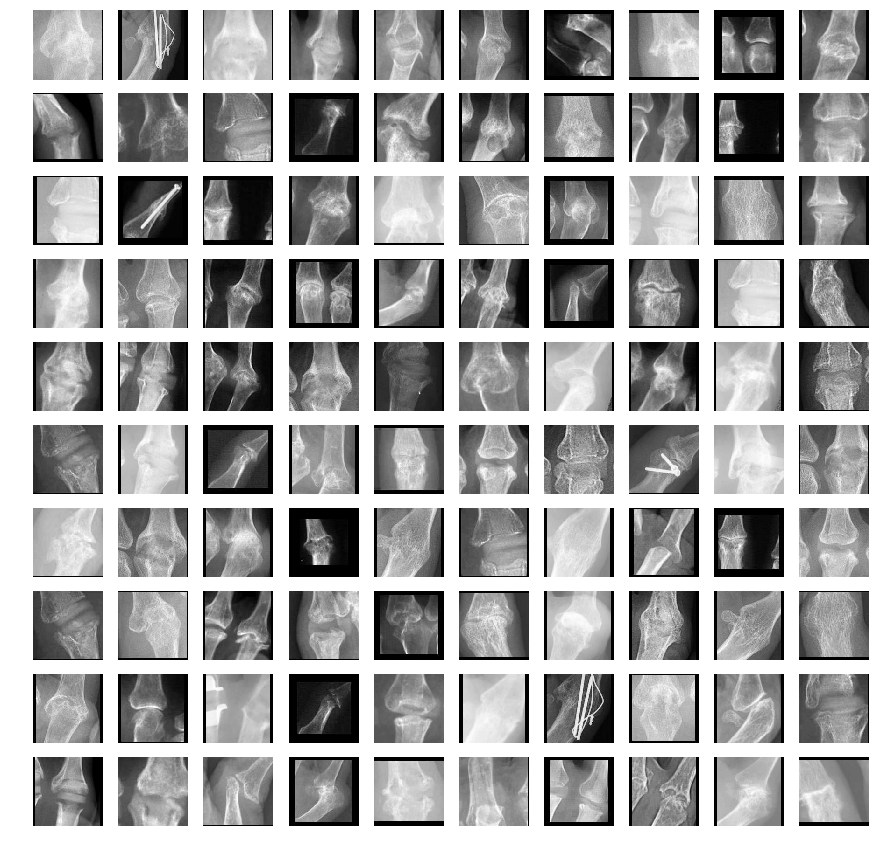

In [33]:
f, axarr = plt.subplots(10, 10, figsize=(15,15))
k = 1

for i in range(10):
    for j in range(10):
        axarr[i, j].imshow(wrong[k].squeeze(), cmap='gray')
        axarr[i, j].axis('off')
        k = k + 1

plt.show()

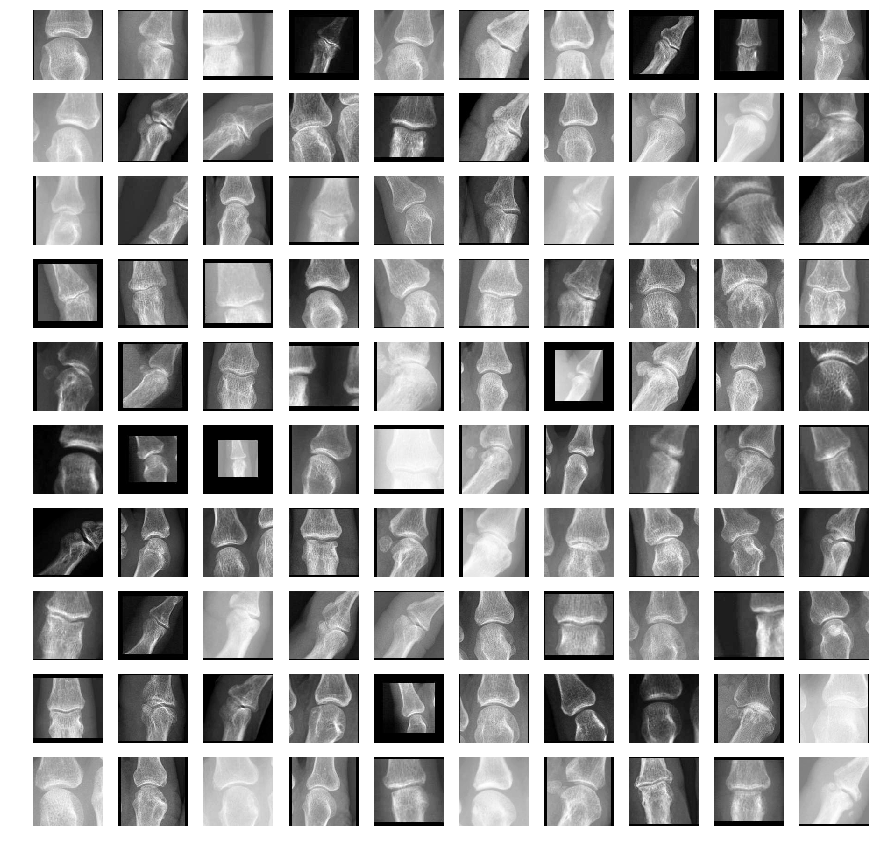

In [34]:
correct = img_test[np.abs(pred - labels_test) == 0]

f, axarr = plt.subplots(10, 10, figsize=(15,15))
k = 1

for i in range(10):
    for j in range(10):
        axarr[i, j].imshow(correct[k].squeeze(), cmap='gray')
        axarr[i, j].axis('off')
        k = k + 1

plt.show()